# Demonstração do pacote de ferramentas de desenvolvimento de algoritmos pra imageamento em microondas

*Autor: André Costa Batista*  
*Universidade Federal de Minas Gerais*  
*Outubro de 2020*  

## Informações sobre o experimento

* Três versões diferentes do Método Iterativo de Born utilizando a discretização do Método do Subdomínio com 5 iterações:  
  1. Regularização de Tikhonov com $\alpha = 10^{-4}$;
  2. Regularização de Tikhonov com $\alpha = 10^{-5}$;
  3. Regularização de Landweber.
* Fatores variantes: raio de observação (1.5$\lambda$, 2.0$\lambda$, 3.0$\lambda$), ruído nos dados ($10^{-1}$, $10^{-2}$, $10^{-3}$) e padrão de objetos (polígonos regulares, polígonos aleatórios);
* Fatores fixos: número de fontes e receptores (10), máximo contraste (1), densidade máxima de contraste normalizada (20\%), raio máximo dos objetos (.4$\lambda$);
* Tamanho amostral: 25 observações por amostra (450 cenários diferentes, 1350 execuções, algumas horas pra rodar tudo).

## Primeiro passo

Carregar todas as bibliotecas necessárias:

In [1]:
# How to import the module
import copy as cp
import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
import sys
sys.path.insert(1, './library_v2')

# Import module
import subdomain as sub
import configuration as cfg
import experiment as exp
import inputdata as ipt
import analytical as ana
import subdomain as sub
import weightedresiduals as wrm
import mom_cg_fft as mom
import bim

## Carregar o objeto do experimento com os resultados

In [2]:
experiment_name = 'debug_experiment'
saved_files_path = './debug/files/'

# Set up experiment object
myexp = exp.Experiment(import_filename=experiment_name,
                       import_filepath=saved_files_path)

## Comparação entre observações

Fixar uma amostra e comparar as observações: $R_O = 1.5\lambda$, $\delta = 10^{-1}$, polígonos regulares

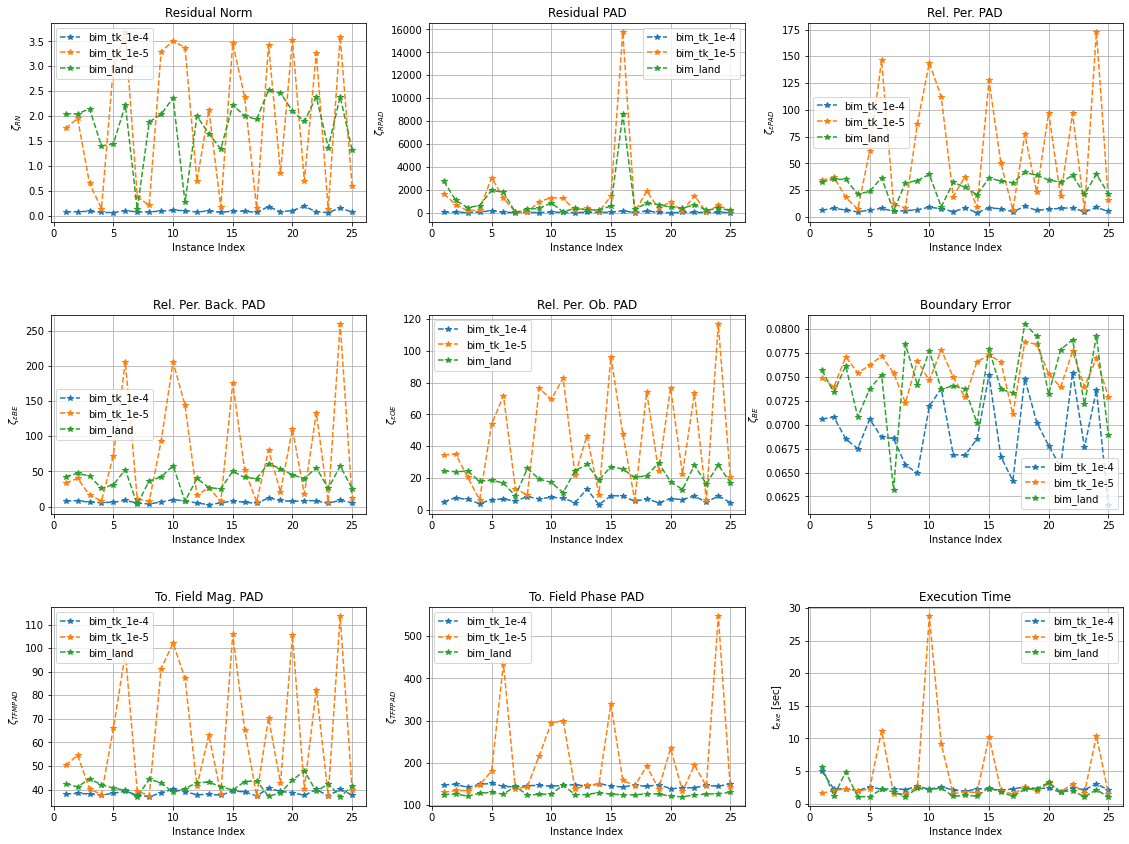

In [3]:
# Compare each observation of a single sample for all measure
myexp.fixed_sampleset_plot(method_idx=[0, 1, 2],
                           file_path=saved_files_path,
                           file_format='eps',
                           show=True)

## Comparação com uma amostra e múltiplos indicadores

Fixar uma amostra e retornar os resultados pra cada indicador: $R_O = 1.5\lambda$, $\delta = 10^{-1}$, polígonos regulares

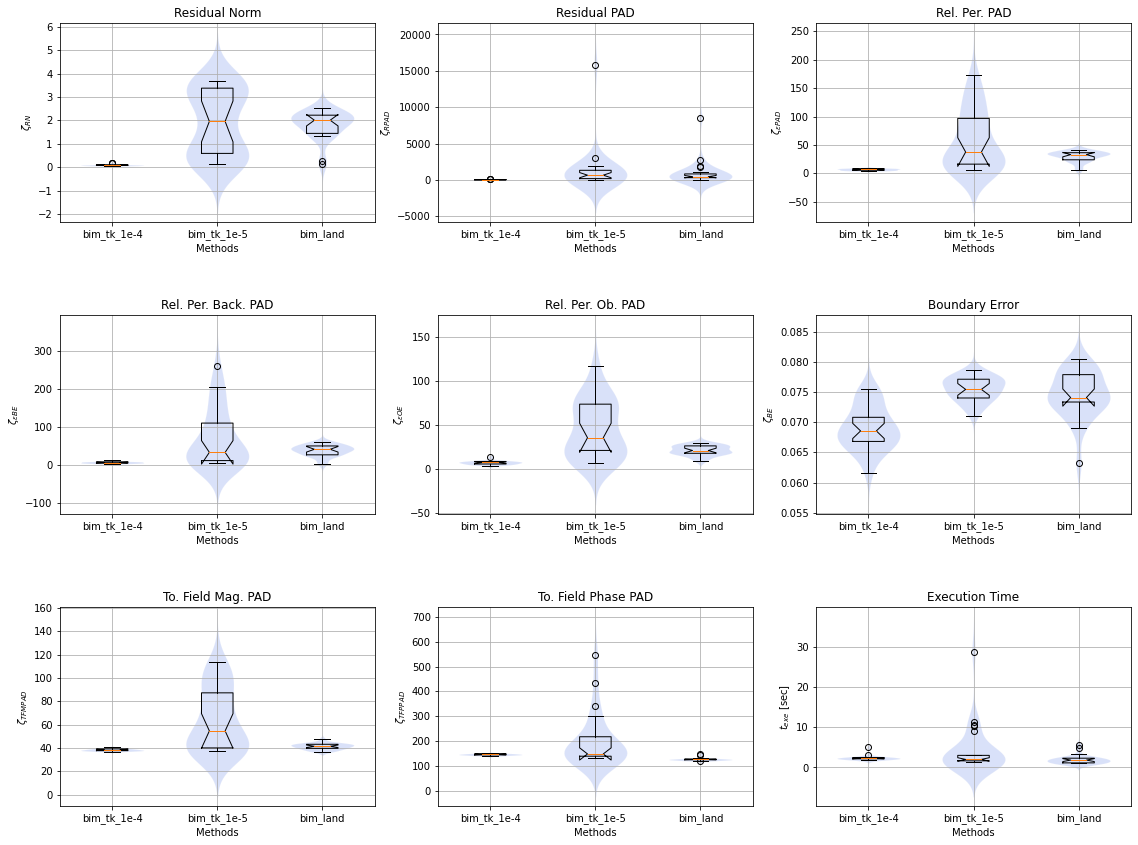

In [4]:
# Compare same sample for multiple measure
myexp.fixed_sampleset_violinplot(method_idx=[0, 1, 2],
                                 file_path=saved_files_path,
                                 file_format='eps',
                                 show=True)

## Comparação de múltiplas amostras e um indicador

Fixar um indicador e múltiplas amostras: Indicador $\zeta_{\epsilon PAD}$; $R_O = 1.5\lambda$; $\delta = 10^{-1}, 10^{-2}, 10^{-3}$; polígonos regulares e aleatórios.

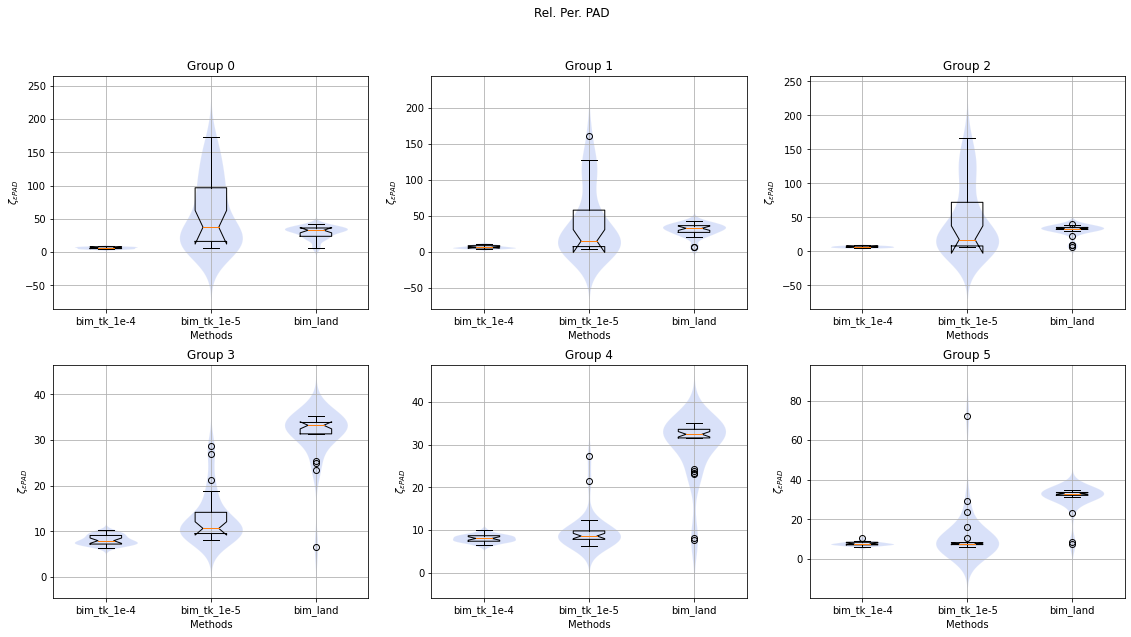

In [5]:
# Compare same measure for multiple samples
myexp.fixed_measure_violinplot('zeta_epad',
                               group_idx=[i for i in range(6)],
                               method_idx=[0, 1, 2],
                               file_path=saved_files_path,
                               file_format='eps',
                               show=True)

## Evolução dos algoritmos

Fixar um fator e comparar seus níveis para vários indicadores: $R_O = 1.5\lambda$; $\delta = 10^{-1}, 10^{-2}, 10^{-3}$; polígonos regulares.

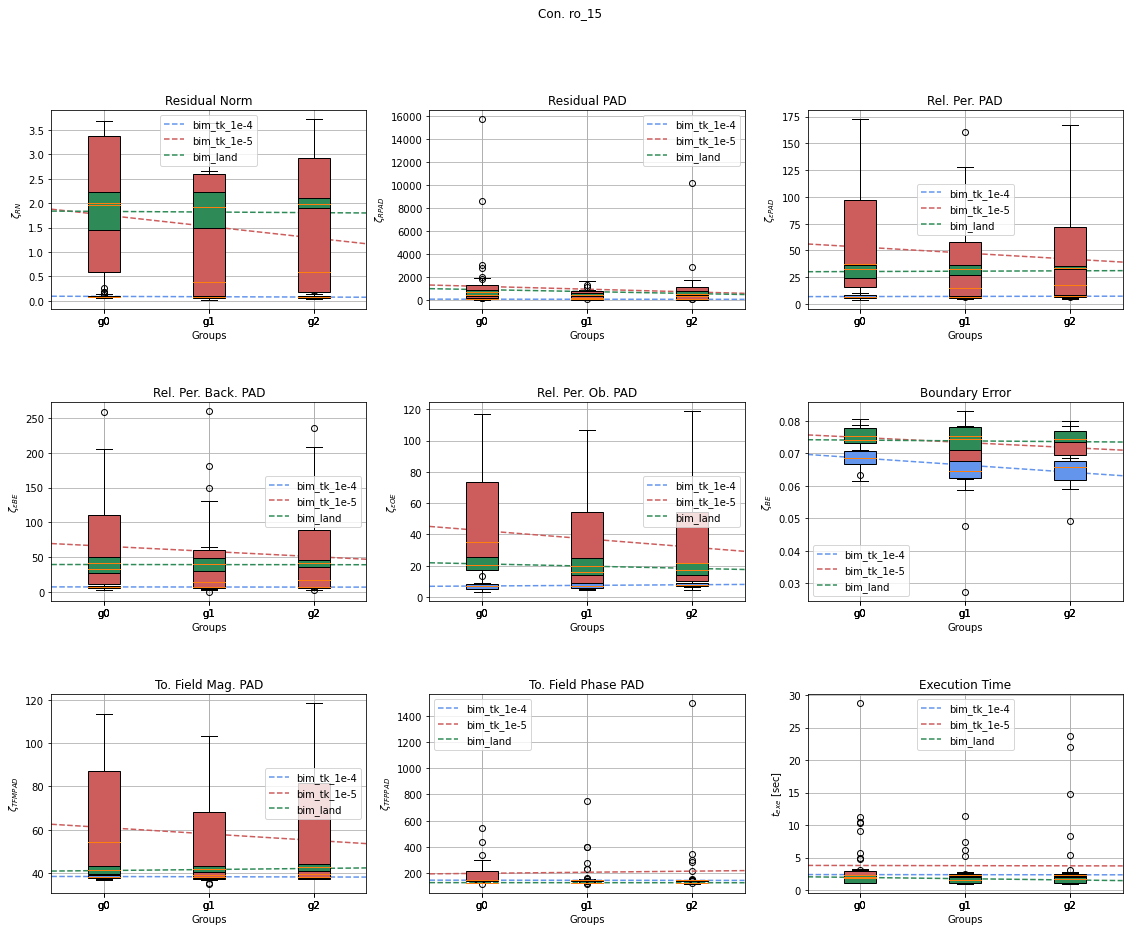

In [6]:
# Show performance when noise varies
myexp.evolution_boxplot(group_idx=[0, 1, 2],
                        method_idx=[0, 1, 2],
                        file_path=saved_files_path,
                        file_format='eps',
                        show=True)

## N-melhores imagens recuperadas de uma amostra

* $\zeta_{\epsilon PAD}$
* $R_O = 3.\lambda$;
* $\delta = 10^{-3}$
* Polígonos regulares.

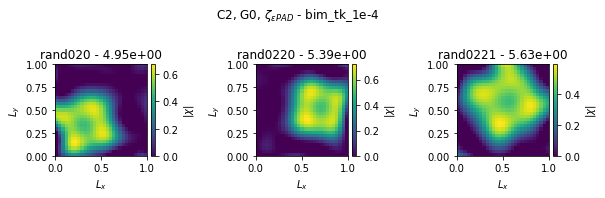

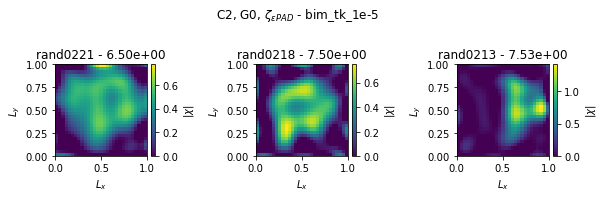

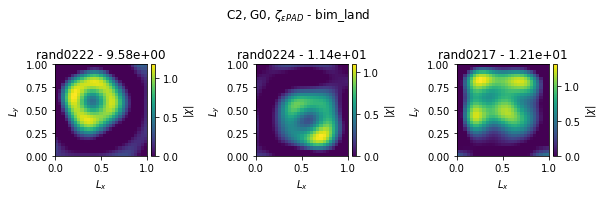

In [8]:
# Plot N-best recovered images
myexp.plot_nbest_results(3,
                         'zeta_epad',
                         group_idx=[0],
                         config_idx=[2],
                         method_idx=[0, 1, 2],
                         file_path=saved_files_path,
                         file_format='eps',
                         show=True)

## Comparação do intervalo de confiança para múltiplas amostras

* $\zeta_{\epsilon PAD}$ e tempo de execução
* $R_O = 2.\lambda$;
* $\delta = 10^{-1}, 10^{-2}, 10^{-3}$
* Polígonos regulares.

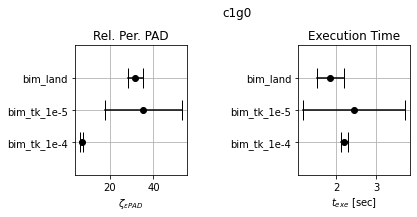

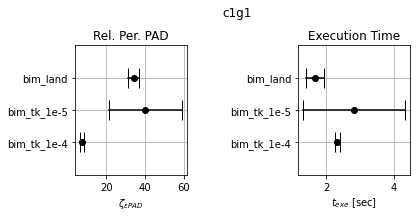

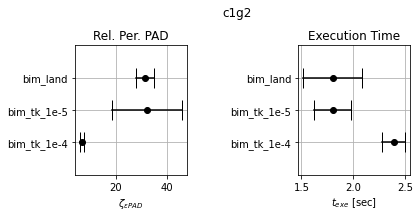

*************************************************
Confidence Interval of Means - *debug_experiment*
*************************************************

Configuration 1, Group 0

Measure: zeta_epad
------------------
* bim_tk_1e-4: [6.39e+00, 7.89e+00] (no evidence that this sample comes from a normal distribution, p-value: 1.445e-02)
* bim_tk_1e-5: [1.79e+01, 5.29e+01] (no evidence that this sample comes from a normal distribution, p-value: 1.401e-05)
* bim_land: [2.83e+01, 3.50e+01] (no evidence that this sample comes from a normal distribution, p-value: 1.655e-04)

Measure: execution_time
-----------------------
* bim_tk_1e-4: [2.12e+00, 2.29e+00] (no evidence that this sample comes from a normal distribution, p-value: 1.892e-03)
* bim_tk_1e-5: [1.19e+00, 3.72e+00] (no evidence that this sample comes from a normal distribution, p-value: 3.444e-09)
* bim_land: [1.52e+00, 2.20e+00] (no evidence that this sample comes from a normal distribution, p-value: 2.547e-03)

Configuration 1, Grou

In [9]:
# Compare methods by confidence interval of means
myexp.study_single_mean(measure=['zeta_epad', 'execution_time'],
                        group_idx=[0, 1, 2],
                        config_idx=[1],
                        method_idx=[0, 1, 2],
                        file_path=saved_files_path,
                        file_format='eps',
                        write=False,
                        printscreen=True,
                        show=True)

## Análise gráfica de normalidade das amostras

* $\zeta_{\epsilon PAD}$ e tempo de execução
* $R_O = 2.\lambda$;
* $\delta = 10^{-1}, 10^{-2}, 10^{-3}$
* Polígonos regulares.

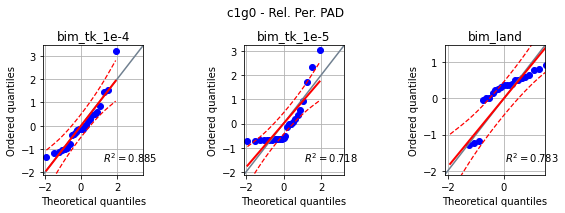

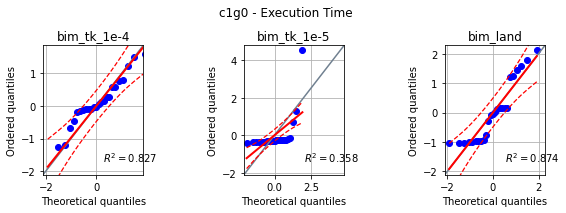

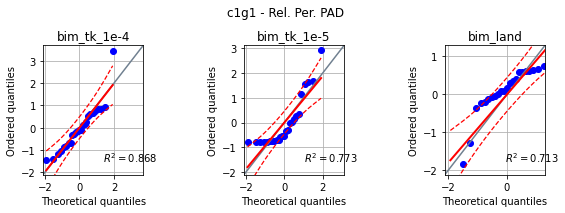

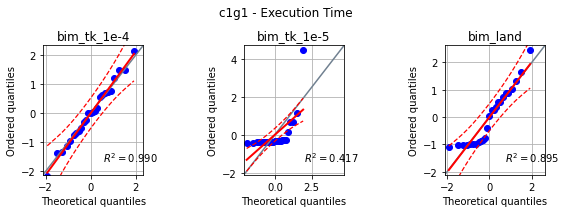

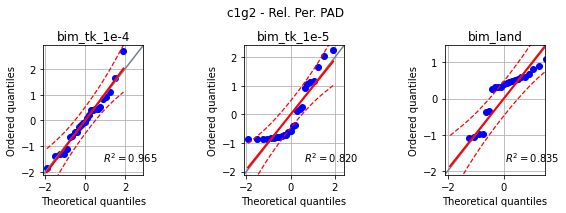

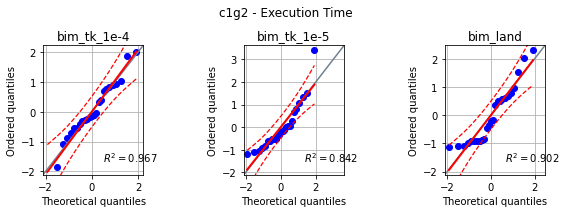

In [10]:
# Check normality assumption
myexp.plot_normality(measure=['zeta_epad', 'execution_time'],
                     group_idx=[0, 1, 2],
                     config_idx=[1],
                     method_idx=[0, 1, 2],
                     file_path=saved_files_path,
                     file_format='eps',
                     show=True)

## Comparação entre um par de algoritmos

* Algoritmos: bim_tk_1e-4, bim_tk_1e-5
* $R_O = 1.5\lambda, 2.\lambda, 3.\lambda$;
* $\delta = 10^{-1}, 10^{-2}, 10^{-3}$
* Polígonos regulares.

In [11]:
# Compare methods 0 and 1
myexp.compare_two_methods(group_idx=[0, 1, 2],
                          config_idx=[0, 1, 2],
                          write=False,
                          printscreen=True,
                          file_path=saved_files_path)

*********************************
Paired Study - *debug_experiment*
*********************************

Methods: bim_tk_1e-4, bim_tk_1e-5
#################################

Significance level: 0.05
Power: 0.80

Configuration ro_15

Group 0
-------
* zeta_rn (Wilcoxon-Test): Equality hypothesis rejected (pvalue: 5.96e-08)
  Better performance of bim_tk_1e-4 has been detected (pvalue: 2.98e-08).
* zeta_rpad (Log Transformation): No evidence against difference in performance (pvalue: 1.00e+00, effect size: 4.997e-01).
  No evidence against a better performance of bim_tk_1e-4 (pvalue: 2.40e+01).
* zeta_epad (Log Transformation): No evidence against difference in performance (pvalue: 1.00e+00, effect size: 6.654e-01).
  No evidence against a better performance of bim_tk_1e-4 (pvalue: 2.40e+01).
* zeta_ebe (Wilcoxon-Test): Equality hypothesis rejected (pvalue: 5.96e-08)
  Better performance of bim_tk_1e-4 has been detected (pvalue: 2.98e-08).
* zeta_eoe (Square-root Transformation): No eviden

([[[&#39;1&lt;2&#39;, &#39;1&lt;2&#39;, &#39;1&lt;2&#39;, &#39;1&lt;2&#39;, &#39;1&lt;2&#39;, &#39;1&lt;2&#39;, &#39;1&lt;2&#39;, &#39;1=2&#39;, &#39;1=2&#39;],
   [&#39;1&lt;2&#39;, &#39;1&lt;2&#39;, &#39;1&lt;2&#39;, &#39;1&lt;2&#39;, &#39;1&lt;2&#39;, &#39;1&lt;2&#39;, &#39;1&lt;2&#39;, &#39;1=2&#39;, &#39;1=2&#39;],
   [&#39;1&lt;2&#39;, &#39;1&lt;2&#39;, &#39;1&lt;2&#39;, &#39;1&lt;2&#39;, &#39;1&lt;2&#39;, &#39;1&lt;2&#39;, &#39;1&lt;2&#39;, &#39;1=2&#39;, &#39;1=2&#39;]],
  [[&#39;1&lt;2&#39;, &#39;1&lt;2&#39;, &#39;1&lt;2&#39;, &#39;1&lt;2&#39;, &#39;1&lt;2&#39;, &#39;1&lt;2&#39;, &#39;1&lt;2&#39;, &#39;1=2&#39;, &#39;1&gt;2&#39;],
   [&#39;1&lt;2&#39;, &#39;1&lt;2&#39;, &#39;1&lt;2&#39;, &#39;1&lt;2&#39;, &#39;1&lt;2&#39;, &#39;1&lt;2&#39;, &#39;1&lt;2&#39;, &#39;1=2&#39;, &#39;1=2&#39;],
   [&#39;1&lt;2&#39;, &#39;1&lt;2&#39;, &#39;1&lt;2&#39;, &#39;1&lt;2&#39;, &#39;1&lt;2&#39;, &#39;1&lt;2&#39;, &#39;1&lt;2&#39;, &#39;1=2&#39;, &#39;1&lt;2&#39;]],
  [[&#39;1&lt;2&#39;, &#39

## Comparação entre múltiplos algoritmos

* Algoritmos: bim_tk_1e-4, bim_tk_1e-5
* $R_O = 1.5\lambda, 2.\lambda, 3.\lambda$;
* $\delta = 10^{-1}, 10^{-2}, 10^{-3}$
* Polígonos regulares e randômicos.

In [12]:
# Compare all methods
myexp.compare_multiple_methods(group_idx=[0, 1, 2, 3, 4, 5],
                               method_idx=[0, 1, 2],
                               config_idx=[0, 1, 2],
                               file_path=saved_files_path,
                               write=False,
                               printscreen=True,
                               all2all=True)

***************************************
Multile Comparison - *debug_experiment*
***************************************

Methods: bim_tk_1e-4, bim_tk_1e-5, bim_land
###########################################

Significance level: 0.05

Configuration ro_15

Group 0
-------
* zeta_rn (Non Normal Data): Evidence has been detected for difference in performance (p-value: 5.729e-11).
  - All-to-all comparison (Mann-Whitney Rank Test):
    * bim_tk_1e-4 and bim_tk_1e-5: Evidence detected for difference in probability of superiorit (p-value: 2.606e-09).
    * bim_tk_1e-4 and bim_land: Evidence detected for difference in probability of superiorit (p-value: 1.014e-09).
    * bim_tk_1e-5 and bim_land: Not enough evidence against the hypothesis of same probability of superiority (p-value: 4.155e-01).
* zeta_rpad (Log transformation) (unequal variances): Equality of means hypothesis rejected(p-value: 1.541e-13).
  - All-to-all comparison (unequal variances):
    * bim_tk_1e-4 and bim_tk_1e-5: Detec

## Análise Fatorial de um dos algoritmos

* Algoritmo: bim_lan
* Indicador: $\zeta_{\epsilon PAD}$
* $R_O = 1.5\lambda, 2.\lambda, 3.\lambda$;
* $\delta = 10^{-1}, 10^{-2}, 10^{-3}$
* Polígonos regulares e randômicos.

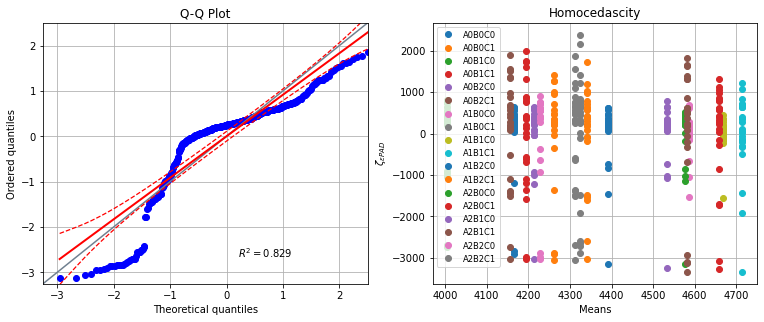

*********************************
Factor Study - *debug_experiment*
*********************************

Method: bim_land
################

Significance level: 0.05
Factors: configuration (levels: ro_15, ro_20, ro_30), noise (levels: 1.0e-03, 1.0e-02, 1.0e-01), map_pattern (levels: random_polygons, regular_polygons)

Measure: zeta_epad

* configuration (main effect): detected difference between levels (p-value: 3.240e-01).
* noise (main effect): failure in rejecting the hypothesis of equality between levels (p-value: 3.240e-01).
* map_pattern (main effect): failure in rejecting the hypothesis of equality between levels (p-value: 8.484e-01).
* Interaction effect between configuration and noise: failure in rejecting the hypothesis of no-iteraction effect between these factors (p-value: 5.225e-01).
* Interaction effect between configuration and map_pattern: failure in rejecting the hypothesis of no-iteraction effect between these factors (p-value: 7.432e-01).
* Interaction effect between no

In [13]:
# Factorial analysis
myexp.factor_study(2,
                   config_idx=[0, 1, 2],
                   group_idx=[0, 1, 2, 3, 4, 5],
                   measure=['zeta_epad'],
                   write=False,
                   printscreen=True,
                   show=True,
                   file_path=saved_files_path,
                   figure_format='eps')
